In [74]:
import numpy as np
import sys
import pygame

import math
import random

import gym
import gym_maze
import matplotlib.pyplot as mt

from gym import wrappers

In [119]:
def run():
    gamma = 0.99

    alpha = max(alphaMin, min(0.7, 1.0 - math.log10((0 + 1) / decayRate)))
    decayedEpsilon = min(0.7, 1.0 - math.log10((0 + 1) / decayRate))
    epsilon = max(epsilonMin, decayedEpsilon)

    for i in range(maxEpisodes):
        print('---------------------------------------------------------------------')
        
        done = False
        finalReward = 0

        currentState = env.reset()
        currentState = (int(currentState[0]), int(currentState[1]))
        
        
                
        for t in range(maxTime):  # restricting the infinite loop
            env.render()
            
            if(i<20):
                a1.append(QTable[ourState][0])
                a2.append(QTable[ourState][1])
                a3.append(QTable[ourState][2])
                a4.append(QTable[ourState][3])
            if(i<20):
                a11.append(QTable[ourState1][0])
                a21.append(QTable[ourState1][1])
                a31.append(QTable[ourState1][2])
                a41.append(QTable[ourState1][3])
            
            
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:  # Select the action with the highest q
                action = int(np.argmax(QTable[currentState]))

            nextState, reward, done, info = env.step(action)

            nextState = (int(nextState[0]), int(nextState[1]))

            finalReward += reward

            bestQValue = np.amax(QTable[nextState])
            QTable[currentState + (action,)] += alpha * (
                    reward + gamma * (bestQValue) - QTable[currentState + (action,)])

            currentState = nextState

            if done:  # if found goal then go start next episode
                print('-->Episode:', i, ' finalReward:', finalReward, ' finished timesteps:', t)
                if (t <= np.prod(MAZE_SIZE, dtype=int)):
                    streaks += 1
                else:
                    streaks = 0
                graph.append(finalReward)
                break

            if t >= maxTime - 1:  # timeout condition--> to restrict infinite loop and not going to goal
                print('-->Episode:', i, ' finalReward:', finalReward, ' timeout timesteps:', t)
                print('-----------timeOut-----------')
                graph.append(finalReward)
                break
        if (streaks > stopStreak):
            print('path continued for ', stopStreak, ' times...stopped')
            break

        alpha = max(alphaMin, min(0.8, 1.0 - math.log10((i + 1) / decayRate)))
        decayedEpsilon = min(0.8, 1.0 - math.log10((i + 1) / decayRate))
        epsilon = max(epsilonMin, decayedEpsilon)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maze size: (5, 5)
num of buckets: (5, 5)
env.action_space: Discrete(4)
num of actions: 4
observation space: Box(2,)
state bounds: [(0.0, 4.0), (0.0, 4.0)]
min exploration rate: 0.001
min learning rate: 0.2
Decay factor: 2.5
num of episodes: 100000
max time: 2500
stop for continuous: 100
solved t: 25
q table: 5
(5, 5, 4)
---------------------------------------------------------------------
-->Episode: 0  finalReward: -0.31200000000000094  finished timesteps: 328
---------------------------------------------------------------------
-->Episode: 1  finalReward: -0.6920000000000013  finished timesteps: 423
---------------------------------------------------------------------
-->Episode: 2  finalReward: 0.5119999999999996  finished timesteps: 122
---------------------------------------------------------------------
-->Episode: 3  finalReward: 0.5959999999999996  finished timesteps: 101
--------

-->Episode: 59  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 60  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 61  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 62  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 63  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 64  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 65  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 66  finalReward: 0.948  finished timesteps: 13
--------------------------------------

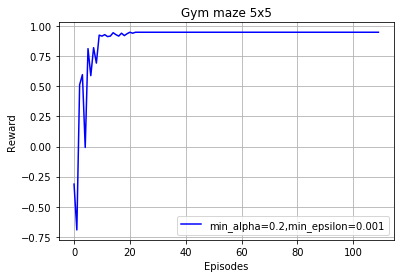

No handles with labels found to put in legend.


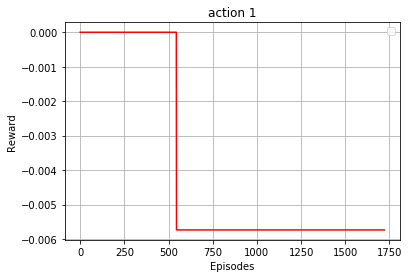

No handles with labels found to put in legend.


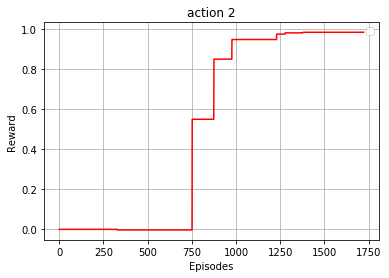

No handles with labels found to put in legend.


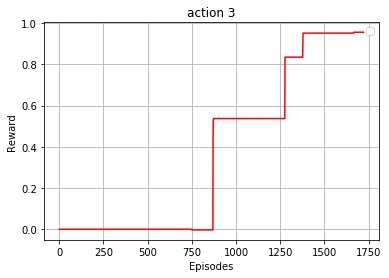

No handles with labels found to put in legend.


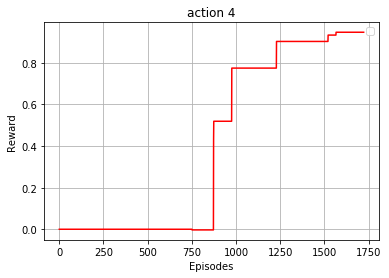

No handles with labels found to put in legend.


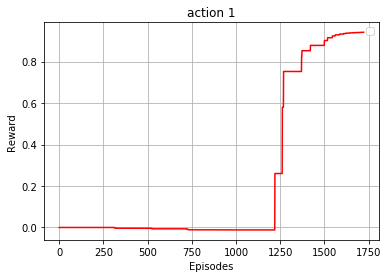

No handles with labels found to put in legend.


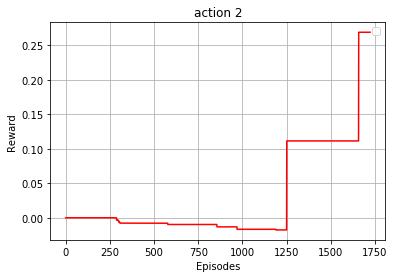

No handles with labels found to put in legend.


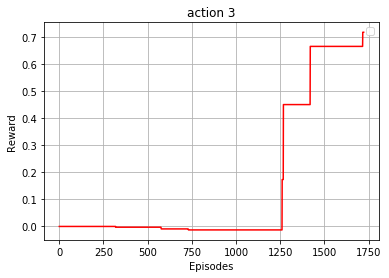

No handles with labels found to put in legend.


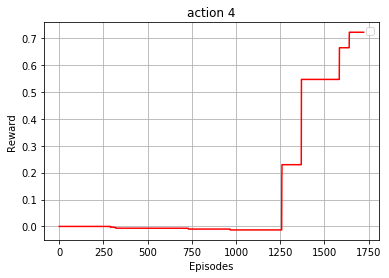

In [121]:
# env = gym.make('maze-random-5x5-v0')
env = gym.make('maze-sample-5x5-v0')

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
print('maze size:', MAZE_SIZE)

NUM_BUCKETS = MAZE_SIZE  # one bucket per grid
print('num of buckets:', NUM_BUCKETS)

NUM_ACTIONS = env.action_space.n
print('env.action_space:', env.action_space)  # actions N,S,E,W
print('num of actions:', NUM_ACTIONS)

STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print('observation space:', env.observation_space)
print('state bounds:', STATE_BOUNDS)

epsilonMin = 0.001  # epsilon = for exploration min value
print('min exploration rate:', epsilonMin)

alphaMin = 0.2  # alpha= for learning rate min value
print('min learning rate:', alphaMin)

decayRate = np.prod(MAZE_SIZE, dtype=float) / 10.0  # for exploitation purpose
print('Decay factor:', decayRate)

maxEpisodes = 100000
print('num of episodes:', maxEpisodes)

maxTime = np.prod(MAZE_SIZE, dtype=int) * 100
print('max time:', maxTime)

stopStreak = 100
print('stop for continuous:', stopStreak)

SOLVED_T = np.prod(MAZE_SIZE, dtype=int)
print('solved t:', SOLVED_T)

QTable = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,), dtype=float)  # STATES x ACTIONS matrix
print('q table:', len(QTable))
print(QTable.shape)
# print(QTable)
streaks = 0

graph = []

ourState=(4,2)
ourState1=(3,2)
a1=[]
a2=[]
a3=[]
a4=[]


a11=[]
a21=[]
a31=[]
a41=[]
run()

mt.figure('Gym maze 5x5')
mt.plot(range(len(graph)), graph, 'b', label='min_alpha=0.2,min_epsilon=0.001')
mt.title('Gym maze 5x5')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a1)), a1, 'r')
mt.title('action 1')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a2)), a2, 'r')
mt.title('action 2')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a3)), a3, 'r')
mt.title('action 3')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a4)), a4, 'r')
mt.title('action 4')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

# ---------------------------------
mt.figure('Gym maze 5x5')
mt.plot(range(len(a11)), a11, 'r')
mt.title('action 1')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a21)), a21, 'r')
mt.title('action 2')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a31)), a31, 'r')
mt.title('action 3')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

mt.figure('Gym maze 5x5')
mt.plot(range(len(a41)), a41, 'r')
mt.title('action 4')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maze size: (5, 5)
num of buckets: (5, 5)
env.action_space: Discrete(4)
num of actions: 4
observation space: Box(2,)
state bounds: [(0.0, 4.0), (0.0, 4.0)]
min exploration rate: 0.01
min learning rate: 0.3
Decay factor: 2.5
num of episodes: 10000
max time: 2500
stop for continuous: 100
solved t: 25
q table: 5
(5, 5, 4)
---------------------------------------------------------------------
-->Episode: 0  finalReward: 0.16399999999999937  finished timesteps: 209
---------------------------------------------------------------------
-->Episode: 1  finalReward: -0.7640000000000013  finished timesteps: 441
---------------------------------------------------------------------
-->Episode: 2  finalReward: 0.35999999999999954  finished timesteps: 160
---------------------------------------------------------------------
-->Episode: 3  finalReward: 0.4439999999999996  finished timesteps: 139
----------

-->Episode: 96  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 97  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 98  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 99  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 100  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 101  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 102  finalReward: 0.944  finished timesteps: 14
---------------------------------------------------------------------
-->Episode: 103  finalReward: 0.948  finished timesteps: 13
----------------------------------

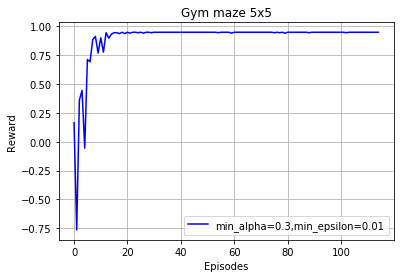

In [98]:
# env = gym.make('maze-random-5x5-v0')
env = gym.make('maze-sample-5x5-v0')

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
print('maze size:', MAZE_SIZE)

NUM_BUCKETS = MAZE_SIZE  # one bucket per grid
print('num of buckets:', NUM_BUCKETS)

NUM_ACTIONS = env.action_space.n
print('env.action_space:', env.action_space)  # actions N,S,E,W
print('num of actions:', NUM_ACTIONS)

STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print('observation space:', env.observation_space)
print('state bounds:', STATE_BOUNDS)

epsilonMin = 0.01  # epsilon = for exploration min value
print('min exploration rate:', epsilonMin)

alphaMin = 0.3  # alpha= for learning rate min value
print('min learning rate:', alphaMin)

decayRate = np.prod(MAZE_SIZE, dtype=float) / 10.0  # for exploitation purpose
print('Decay factor:', decayRate)

maxEpisodes = 10000
print('num of episodes:', maxEpisodes)

maxTime = np.prod(MAZE_SIZE, dtype=int) * 100
print('max time:', maxTime)

stopStreak = 100
print('stop for continuous:', stopStreak)

SOLVED_T = np.prod(MAZE_SIZE, dtype=int)
print('solved t:', SOLVED_T)

QTable = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,), dtype=float)  # STATES x ACTIONS matrix
print('q table:', len(QTable))
print(QTable.shape)
# print(QTable)
streaks = 0

graph = []

run()

mt.figure('Gym maze 5x5')
mt.plot(range(len(graph)), graph, 'b', label='min_alpha=0.3,min_epsilon=0.01')
mt.title('Gym maze 5x5')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maze size: (5, 5)
num of buckets: (5, 5)
env.action_space: Discrete(4)
num of actions: 4
observation space: Box(2,)
state bounds: [(0.0, 4.0), (0.0, 4.0)]
min exploration rate: 0.1
min learning rate: 0.4
Decay factor: 2.5
num of episodes: 10000
max time: 2500
stop for continuous: 100
solved t: 25
q table: 5
(5, 5, 4)
---------------------------------------------------------------------
-->Episode: 0  finalReward: -0.352000000000001  finished timesteps: 338
---------------------------------------------------------------------
-->Episode: 1  finalReward: 0.23199999999999943  finished timesteps: 192
---------------------------------------------------------------------
-->Episode: 2  finalReward: 0.26799999999999946  finished timesteps: 183
---------------------------------------------------------------------
-->Episode: 3  finalReward: 0.6399999999999997  finished timesteps: 90
-------------

-->Episode: 64  finalReward: 0.944  finished timesteps: 14
---------------------------------------------------------------------
-->Episode: 65  finalReward: 0.94  finished timesteps: 15
---------------------------------------------------------------------
-->Episode: 66  finalReward: 0.94  finished timesteps: 15
---------------------------------------------------------------------
-->Episode: 67  finalReward: 0.94  finished timesteps: 15
---------------------------------------------------------------------
-->Episode: 68  finalReward: 0.9199999999999999  finished timesteps: 20
---------------------------------------------------------------------
-->Episode: 69  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 70  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 71  finalReward: 0.944  finished timesteps: 14
----------------------------

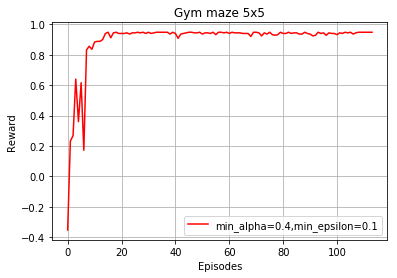

In [104]:
# env = gym.make('maze-random-5x5-v0')
env = gym.make('maze-sample-5x5-v0')

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
print('maze size:', MAZE_SIZE)

NUM_BUCKETS = MAZE_SIZE  # one bucket per grid
print('num of buckets:', NUM_BUCKETS)

NUM_ACTIONS = env.action_space.n
print('env.action_space:', env.action_space)  # actions N,S,E,W
print('num of actions:', NUM_ACTIONS)

STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print('observation space:', env.observation_space)
print('state bounds:', STATE_BOUNDS)

epsilonMin = 0.1  # epsilon = for exploration min value
print('min exploration rate:', epsilonMin)

alphaMin = 0.4  # alpha= for learning rate min value
print('min learning rate:', alphaMin)

decayRate = np.prod(MAZE_SIZE, dtype=float) / 10.0  # for exploitation purpose
print('Decay factor:', decayRate)

maxEpisodes = 10000
print('num of episodes:', maxEpisodes)

maxTime = np.prod(MAZE_SIZE, dtype=int) * 100
print('max time:', maxTime)

stopStreak = 100
print('stop for continuous:', stopStreak)

SOLVED_T = np.prod(MAZE_SIZE, dtype=int)
print('solved t:', SOLVED_T)

QTable = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,), dtype=float)  # STATES x ACTIONS matrix
print('q table:', len(QTable))
print(QTable.shape)
# print(QTable)
streaks = 0

graph = []

run()

mt.figure('Gym maze 5x5')
mt.plot(range(len(graph)), graph, 'r', label='min_alpha=0.4,min_epsilon=0.1')
mt.title('Gym maze 5x5')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maze size: (5, 5)
num of buckets: (5, 5)
env.action_space: Discrete(4)
num of actions: 4
observation space: Box(2,)
state bounds: [(0.0, 4.0), (0.0, 4.0)]
min exploration rate: 0.1
min learning rate: 0.5
Decay factor: 2.5
num of episodes: 10000
max time: 2500
stop for continuous: 100
solved t: 25
q table: 5
(5, 5, 4)
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
---------------------------------------------------------------------
-->Episode: 0  finalReward: 0.03199999999999925  finished timesteps: 242
-----------------------------

-->Episode: 57  finalReward: 0.944  finished timesteps: 14
---------------------------------------------------------------------
-->Episode: 58  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 59  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 60  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 61  finalReward: 0.948  finished timesteps: 13
---------------------------------------------------------------------
-->Episode: 62  finalReward: 0.944  finished timesteps: 14
---------------------------------------------------------------------
-->Episode: 63  finalReward: 0.94  finished timesteps: 15
---------------------------------------------------------------------
-->Episode: 64  finalReward: 0.9279999999999999  finished timesteps: 18
--------------------------

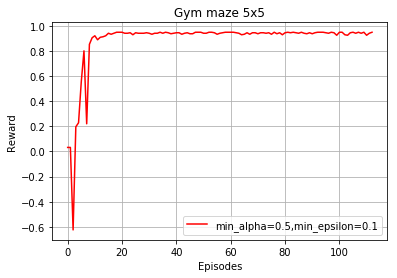

In [106]:
# env = gym.make('maze-random-5x5-v0')
env = gym.make('maze-sample-5x5-v0')

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
print('maze size:', MAZE_SIZE)

NUM_BUCKETS = MAZE_SIZE  # one bucket per grid
print('num of buckets:', NUM_BUCKETS)

NUM_ACTIONS = env.action_space.n
print('env.action_space:', env.action_space)  # actions N,S,E,W
print('num of actions:', NUM_ACTIONS)

STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print('observation space:', env.observation_space)
print('state bounds:', STATE_BOUNDS)

epsilonMin = 0.1  # epsilon = for exploration min value
print('min exploration rate:', epsilonMin)

alphaMin = 0.5  # alpha= for learning rate min value
print('min learning rate:', alphaMin)

decayRate = np.prod(MAZE_SIZE, dtype=float) / 10.0  # for exploitation purpose
print('Decay factor:', decayRate)

maxEpisodes = 10000
print('num of episodes:', maxEpisodes)

maxTime = np.prod(MAZE_SIZE, dtype=int) * 100
print('max time:', maxTime)

stopStreak = 100
print('stop for continuous:', stopStreak)

SOLVED_T = np.prod(MAZE_SIZE, dtype=int)
print('solved t:', SOLVED_T)

QTable = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,), dtype=float)  # STATES x ACTIONS matrix
print('q table:', len(QTable))
print(QTable.shape)
print(QTable)
streaks = 0

graph = []

run()

mt.figure('Gym maze 5x5')
mt.plot(range(len(graph)), graph, 'r', label='min_alpha=0.5,min_epsilon=0.1')
mt.title('Gym maze 5x5')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()

## new 5x5 maze

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
maze size: (5, 5)
num of buckets: (5, 5)
env.action_space: Discrete(4)
num of actions: 4
observation space: Box(2,)
state bounds: [(0.0, 4.0), (0.0, 4.0)]
min exploration rate: 0.001
min learning rate: 0.2
Decay factor: 2.5
num of episodes: 10000
max time: 2500
stop for continuous: 100
solved t: 25
q table: 5
(5, 5, 4)
[[[ 0.4069574   0.38641776  0.82852943  0.38612185]
  [-0.03695689 -0.040999   -0.03817743 -0.03621373]
  [-0.03856488 -0.03998192 -0.04007413 -0.03898399]
  [-0.03208879 -0.03366926 -0.0291111  -0.03213608]
  [-0.03183125 -0.03356072 -0.0331924  -0.03399422]]

 [[ 0.71983029  0.1729233   0.84093882  0.38668253]
  [ 0.60503761 -0.04031689 -0.04066305 -0.04043239]
  [-0.04036357 -0.03871624 -0.03999694 -0.03911158]
  [-0.02926791 -0.027944   -0.02920651 -0.03192359]
  [-0.02774978 -0.02946125  0.87354731 -0.02964817]]

 [[ 0.38253195  0.85347356  0.72889293  0.77629316]
  [-

-->Episode: 94  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 95  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 96  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 97  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 98  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 99  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 100  finalReward: 0.964  finished timesteps: 9
---------------------------------------------------------------------
-->Episode: 101  finalReward: 0.964  finished timesteps: 9
--------------------------------------------

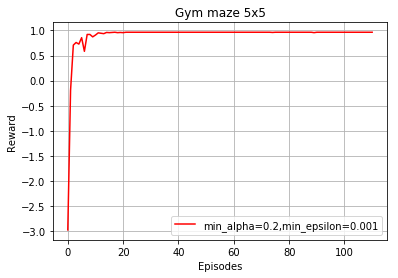

In [108]:
env = gym.make('maze-random-5x5-v0')
# env = gym.make('maze-sample-5x5-v0')

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
print('maze size:', MAZE_SIZE)

NUM_BUCKETS = MAZE_SIZE  # one bucket per grid
print('num of buckets:', NUM_BUCKETS)

NUM_ACTIONS = env.action_space.n
print('env.action_space:', env.action_space)  # actions N,S,E,W
print('num of actions:', NUM_ACTIONS)

STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print('observation space:', env.observation_space)
print('state bounds:', STATE_BOUNDS)

epsilonMin = 0.001  # epsilon = for exploration min value
print('min exploration rate:', epsilonMin)

alphaMin = 0.2  # alpha= for learning rate min value
print('min learning rate:', alphaMin)

decayRate = np.prod(MAZE_SIZE, dtype=float) / 10.0  # for exploitation purpose
print('Decay factor:', decayRate)

maxEpisodes = 10000
print('num of episodes:', maxEpisodes)

maxTime = np.prod(MAZE_SIZE, dtype=int) * 100
print('max time:', maxTime)

stopStreak = 100
print('stop for continuous:', stopStreak)

SOLVED_T = np.prod(MAZE_SIZE, dtype=int)
print('solved t:', SOLVED_T)

# QTable = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,), dtype=float)  # STATES x ACTIONS matrix
print('q table:', len(QTable))
print(QTable.shape)
print(QTable)
streaks = 0

graph = []

run()

mt.figure('Gym maze 5x5')
mt.plot(range(len(graph)), graph, 'r', label='min_alpha=0.2,min_epsilon=0.001')
mt.title('Gym maze 5x5')
mt.ylabel('Reward')
mt.xlabel('Episodes')
mt.legend(loc='best')
mt.grid()
mt.show()